In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.activations import sigmoid, relu, elu, softplus

In [2]:
###FUNCION TO PARSE DATAFRAME FOR NUMBERS###
def parse_dataframe(dataframe, missing_value_key):
    headers = dataframe.columns
    data_values = dataframe.values
    for i in range(len(data_values)):
        for j in range(len(data_values[i])):
            item = data_values[i][j]
            if(isinstance(item, str)):
                item = item.strip()
                item = item.replace('−', '-') #Strainge "-" symbol found in data files
                                              #that does not get parsed by float()
                if item == missing_value_key: #Replacing missing values with 0
                    item = float("NaN")
                    data_values[i][j] = 0
                    continue
                if('±' in item):
                    item = item.split('±')[0].strip()
                    item = float(item)
                else: 
                    try:
                        item = float(item)
                    except:
                        pass
                data_values[i][j] = item
    dataframe = pd.DataFrame(data_values, columns = headers)
    return dataframe

In [3]:
###ARECIBO DATA###
arecibo_df= pd.read_csv('Arecibo_data.txt', sep ='\t',skip_blank_lines=True, 
                      decimal='.')
arecibo_df.drop(['Source ','RA ', 'Dec ', 'W 20 ','SNR ','MHI/M⋆', "Unnamed: 18"], 
              inplace = True, axis = 1) #Dropping unnecessary data
arecibo_df = parse_dataframe(arecibo_df,'-') 

###NANCAY DATA###
nancay_df = pd.read_csv('Nancay_data.txt', sep="\s+", error_bad_lines=False, 
                       warn_bad_lines=False)

nancay_df = nancay_df[['Name','Vopt','g-z','gMAG', 'M*', 'sSFR', 'rms', 
                     'VHI','W50', 'FHI','S/N', 'MHI']] #Selecting relevant data
nancay_df = parse_dataframe(nancay_df,'---')

In [4]:
###PREPARING TRAINING DATA###
x_values= arecibo_df.drop(['M HI ', 'Name '], axis=1).values.astype('float32')
x_values= scale(x_values)
y_values = arecibo_df['M HI '].values.astype('float32')

#The data is already shaped correctly
x_train = x_values[0:60] #Features
y_train = y_values[0:60] #MHI values (not scaled)

x_test = x_values[60:72]
y_test = y_values[60:72]

C:\Users\Gordei\anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Gordei\anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [16]:
###NETWORK PARAMETERS###
n_features = 10
n_h1 = 32
n_h2 = 64
n_h3 = 64
n_h4 = 32

learning_rate = 0.01
epochs = 300

In [17]:
###DEFINING NETWORK###
model = Sequential()
model.add(Dense(n_features, activation = relu))
model.add(Dense(n_h1, activation = relu))
model.add(Dense(n_h2, activation = elu)) #Adding a non-linear activation improves the fit
                                         #On the test data
model.add(Dense(n_h3, activation = relu))
model.add(Dense(n_h4, activation = relu))
model.add(Dense(1, activation = relu))

In [18]:
model.compile(loss=keras.losses.mean_squared_error, 
              optimizer=keras.optimizers.Adam(learning_rate))
model.fit(x_train, y_train, batch_size = 10, epochs = epochs) 
#The network might not train sometimes possibly due to "dead relu" problem

Epoch 1/300
6/6 [==============================] - 0s 665us/step - loss: 40.5421
Epoch 2/300
6/6 [==============================] - 0s 499us/step - loss: 10.2173
Epoch 3/300
6/6 [==============================] - 0s 665us/step - loss: 4.9142
Epoch 4/300
6/6 [==============================] - 0s 665us/step - loss: 2.4970
Epoch 5/300
6/6 [==============================] - 0s 830us/step - loss: 1.8553
Epoch 6/300
6/6 [==============================] - 0s 831us/step - loss: 1.2757
Epoch 7/300
6/6 [==============================] - 0s 831us/step - loss: 0.7355
Epoch 8/300
6/6 [==============================] - 0s 1000us/step - loss: 0.5764
Epoch 9/300
6/6 [==============================] - 0s 998us/step - loss: 0.5110
Epoch 10/300
6/6 [==============================] - 0s 831us/step - loss: 0.2604
Epoch 11/300
6/6 [==============================] - 0s 665us/step - loss: 0.2677
Epoch 12/300
6/6 [==============================] - 0s 997us/step - loss: 0.1866
Epoch 13/300
6/6 [================

6/6 [==============================] - 0s 665us/step - loss: 0.0161
Epoch 104/300
6/6 [==============================] - 0s 665us/step - loss: 0.0174
Epoch 105/300
6/6 [==============================] - 0s 832us/step - loss: 0.0162
Epoch 106/300
6/6 [==============================] - 0s 667us/step - loss: 0.0072
Epoch 107/300
6/6 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 108/300
6/6 [==============================] - 0s 831us/step - loss: 0.0034
Epoch 109/300
6/6 [==============================] - 0s 997us/step - loss: 0.0053
Epoch 110/300
6/6 [==============================] - 0s 997us/step - loss: 0.0036
Epoch 111/300
6/6 [==============================] - 0s 997us/step - loss: 0.0042
Epoch 112/300
6/6 [==============================] - 0s 831us/step - loss: 0.0033
Epoch 113/300
6/6 [==============================] - 0s 832us/step - loss: 0.0038
Epoch 114/300
6/6 [==============================] - 0s 831us/step - loss: 0.0067
Epoch 115/300
6/6 [===========

6/6 [==============================] - 0s 831us/step - loss: 0.0023
Epoch 204/300
6/6 [==============================] - 0s 832us/step - loss: 0.0019
Epoch 205/300
6/6 [==============================] - 0s 831us/step - loss: 0.0017
Epoch 206/300
6/6 [==============================] - 0s 997us/step - loss: 0.0015
Epoch 207/300
6/6 [==============================] - 0s 829us/step - loss: 0.0022
Epoch 208/300
6/6 [==============================] - 0s 831us/step - loss: 0.0016
Epoch 209/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 210/300
6/6 [==============================] - 0s 997us/step - loss: 0.0038
Epoch 211/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 212/300
6/6 [==============================] - 0s 831us/step - loss: 0.0038
Epoch 213/300
6/6 [==============================] - 0s 997us/step - loss: 0.0077
Epoch 214/300
6/6 [==============================] - 0s 832us/step - loss: 0.0062
Epoch 215/300
6/6 [===============

In [19]:
model.evaluate(x_test, y_test) #Testing on test data

1/1 [==============================] - 0s 0s/step - loss: 0.0297


0.02968304045498371

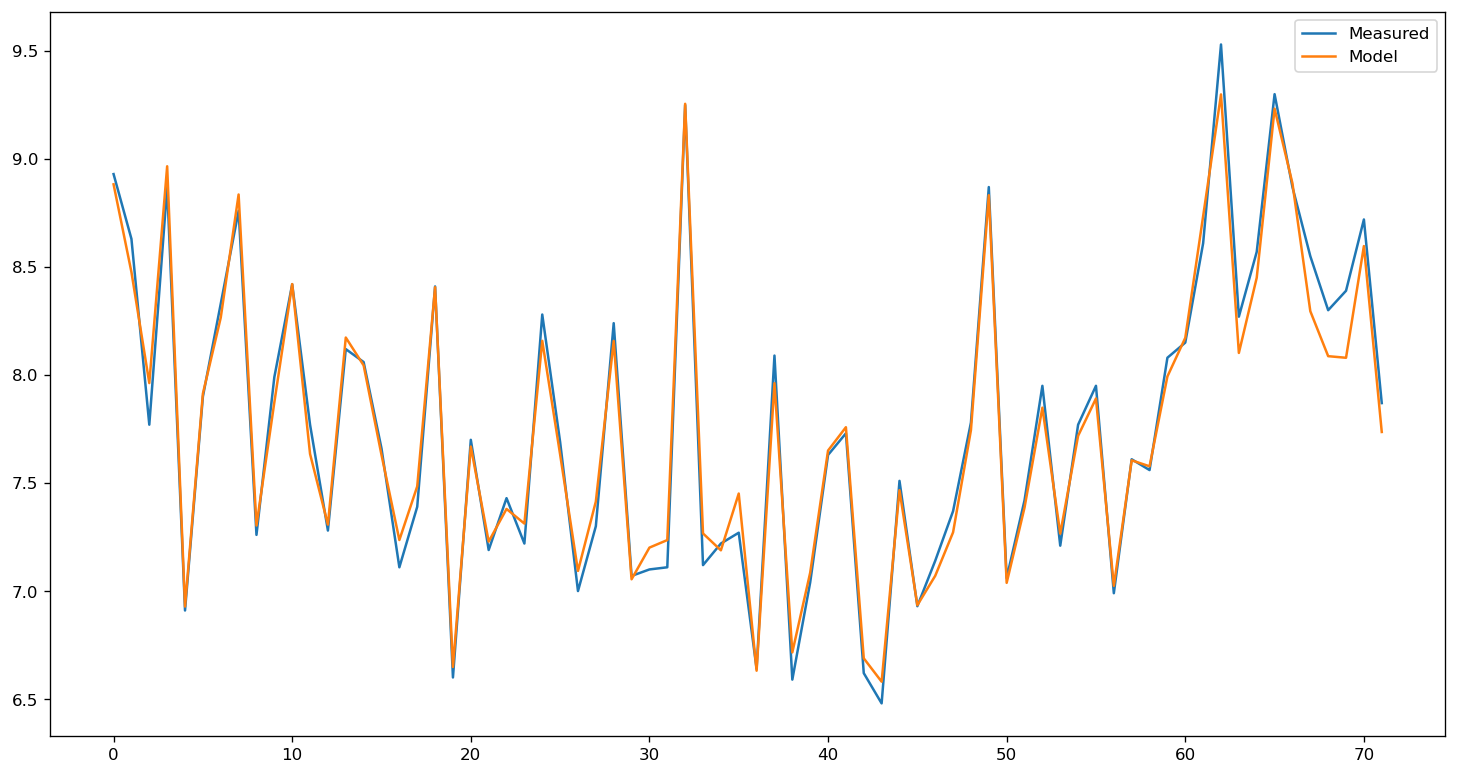

In [20]:
###ARECIBO PLOT###
y_pred = model.predict(x_values)
y = y_values

plt.figure(dpi = 120, figsize=(15,8))
measured_l, = plt.plot(range(0,72), y)
model_l, = plt.plot(range(0,72), y_pred)
plt.legend([measured_l, model_l], ('Measured','Model'))
plt.show()

In [21]:
###ARRAYS FOR NANCAY DATA PLOT###
nancay_x = nancay_df.drop(['Name', 'MHI'], axis = 1).values.astype('float32')
nancay_x = scale(nancay_x)

nancay_y = nancay_df['MHI'].values

C:\Users\Gordei\anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Gordei\anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


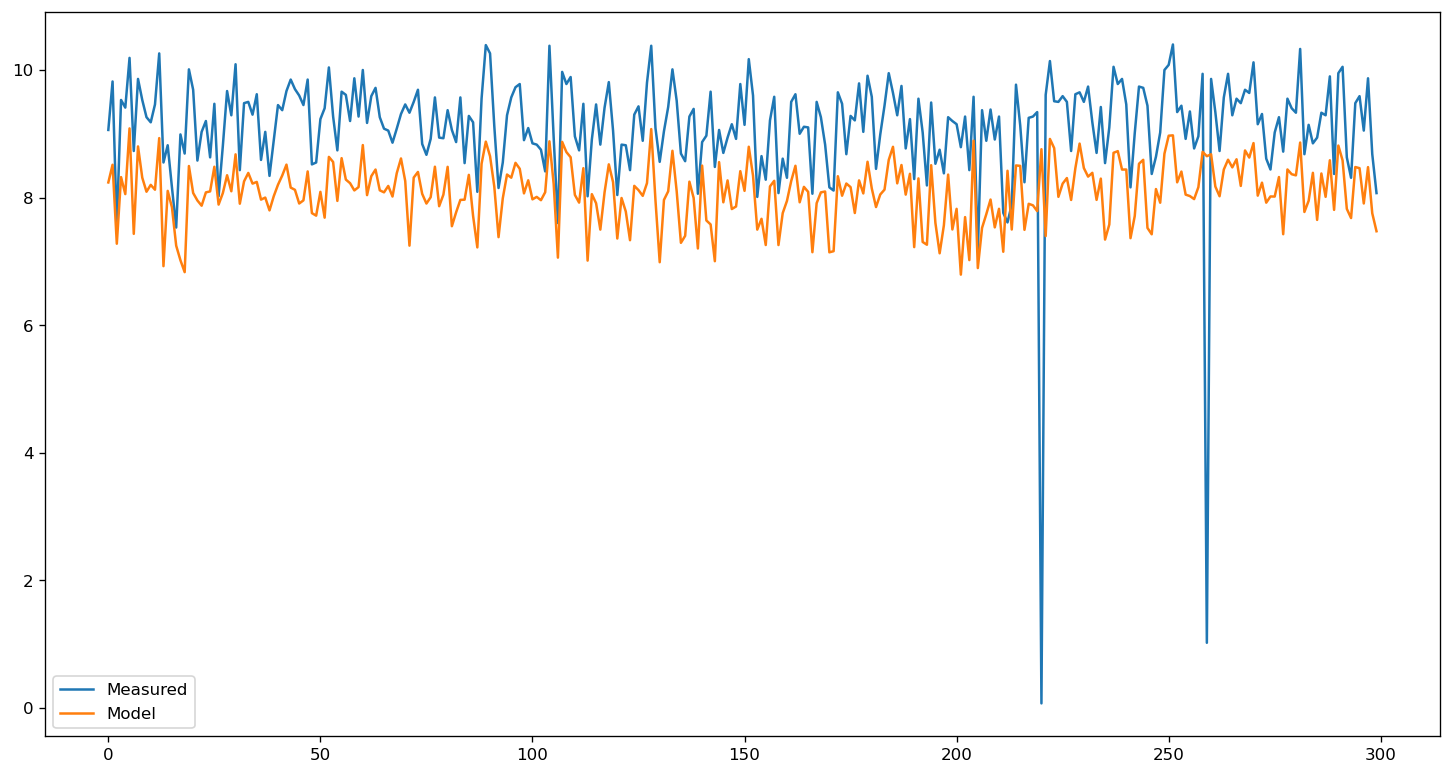

In [22]:
###NANCAY PLOT###
ran = 300
nancay_x_sub = nancay_x[0:ran]
nancay_y_sub = nancay_y[0:ran]
nancay_pred_y = model.predict(nancay_x_sub)

plt.figure(dpi = 120, figsize=(15,8))
measured_l, = plt.plot(range(0, ran), nancay_y_sub)
model_l, = plt.plot(range(0, ran), nancay_pred_y)
plt.legend([measured_l, model_l], ('Measured','Model'))
plt.show()